# **Loan Default Prediction**

----------------------------------------
## **Context and Objective**
----------------------------------------

- It is very critical to be able to identify the loan defaults in the financial domain. Given a set of features about a person, the goal is to predict if the person will default or not.
- In this notebook, we are going to cover the concepts of LVC 3 and try to create a model that predicts if a particular person will default or not.

--------------------
## **Dataset**
--------------------

The dataset used has the below features:

- **Default** - Yes/No, categorical dependent variable suggesting the state of default.
- **Student** - Yes/No, categorical independent variable depicting if the applicant is a student or not.
- **Balance** - The account balance of the applicant.
- **Income** - The income of the applicant.

## **Importing the libraries and overview of the dataset**

In [1]:
import pandas as pd

import numpy as np

import numpy as np

from sklearn import linear_model

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style = 'darkgrid')

# Importing sklearn LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

# Let us now scale the features
from sklearn.preprocessing import StandardScaler



/var/folders/1d/vvddtt8d0w1b_mj90cszx_d40000gn/T/ipykernel_26546/2875285862.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **Loading the data**

In [3]:
# Let us import the files
df = pd.read_csv('../datasets/Default.csv')

In [4]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.53,"44,361.63"
1,2,No,Yes,817.18,"12,106.13"
2,3,No,No,"1,073.55","31,767.14"
3,4,No,No,529.25,"35,704.49"
4,5,No,No,785.66,"38,463.50"


In [5]:
# Dropping the column Unnamed:0 as it is just the index

df.drop(columns = ['Unnamed: 0'], inplace = True)

df.head()

,default,student,balance,income
0,No,No,729.53,"44,361.63"
1,No,Yes,817.18,"12,106.13"
2,No,No,"1,073.55","31,767.14"
3,No,No,529.25,"35,704.49"
4,No,No,785.66,"38,463.50"


### **Encoding categorical variables**

In [6]:
# Let us define a dictionary to replace the Yes/No with numerical values 1 and 0

encoding_dict = {'Yes': 1, 'No': 0}

In [7]:
# Encoding the features

df['default'] = df['default'].map(encoding_dict)

df['student'] = df['student'].map(encoding_dict)

In [8]:
df.head()

,default,student,balance,income
0,0,0,729.53,"44,361.63"
1,0,1,817.18,"12,106.13"
2,0,0,"1,073.55","31,767.14"
3,0,0,529.25,"35,704.49"
4,0,0,785.66,"38,463.50"


Let's check what is the percentage of defaulters and non-defaulters in the data.

In [9]:
df['default'].value_counts(normalize = True)

default
0   0.97
1   0.03
Name: proportion, dtype: float64

- Only 3.33% of data points represent the class Default.

Let us also have a look at the info of the data.

### **Checking the info of the data**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


- There do not seem to be any missing values. Let us get straight to the modeling.

## **Linear Discriminant Analysis**

In [11]:
# Using only one feature - balance

balance = df.balance.values.reshape(len(df['balance']), 1)

default = df.default.values.reshape(len(df['default']), 1)

student = df.student.values.reshape(len(df['student']), 1)

income = df.income.values.reshape(len(df['income']), 1)

features = ['balance', 'student', 'income']

# Fitting a LDA model

lda = LinearDiscriminantAnalysis()

lda.fit(balance, df['default'])

lda_error_rate = (1 - lda.score(balance, default))*100

# Fitting a QDA model

qda = QuadraticDiscriminantAnalysis()

qda.fit(balance, df['default'])

qda_error_rate = (1 - qda.score(balance, default))*100

print("LDA error rate while using only balance as a feature is {}% ".format(np.round(lda_error_rate, 2)))

print("QDA error rate while using only balance as a feature is {}%".format(np.round(qda_error_rate, 2)))

LDA error rate while using only balance as a feature is 2.81% 
QDA error rate while using only balance as a feature is 2.74%


In [12]:
# Let us now use all the features
lda.fit(df[features], df['default'])

qda.fit(df[features], df['default'])

new_lda_error_rate = (1 - lda.score(df[features], df['default']))*100

new_qda_error_rate = (1 - qda.score(df[features], df['default']))*100

print("LDA error rate using all the features is {}% ".format(np.round(new_lda_error_rate, 2)))

print("QDA error rate using all the features is {}%".format(np.round(new_qda_error_rate, 2)))

LDA error rate using all the features is 2.76% 
QDA error rate using all the features is 2.7%


**Observation:**

- We observe that by using all the features to predict default, the error rate has reduced.

## **Logistic Regression**

In [16]:
lr = LogisticRegression(max_iter = 100)

lr.fit(balance, df['default'])

lr_error_rate = (1 - lr.score(balance, df['default']))*100

print("Logistic Regression error rate using balance feature is {}% ".format(np.round(lr_error_rate, 2)))

Logistic Regression error rate using balance feature is 2.75% 


In [17]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression()>

In [19]:
lrm = LogisticRegression()

lrm.fit(df[features], df['default'])

lr_error_rate = (1 - lrm.score(df[features], df['default']))*100

lrm_r = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrm_r.fit(df[features], df['default'])

lrm_r_error_rate = (1 - lrm_r.score(df[features], df['default']))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr_error_rate, 2)))

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r_error_rate, 2)))

Logistic Regression error rate using all the features is 2.68% 
Logistic Regression error rate using absolute value (Lasso) regularization is 2.65% 


**Observations:**

- We calculated the error rates for LDA, QDA, and Logistic Regression.
- The hyperparameter - 'multi_class' takes care of the multiclass classification.
- To evaluate the model and to check how well it performs on unseen data, always take a validation set out and check the performance of the model on the same.
- Let us now move to K-NN, where we demonstrate the validation set performance check.

## **K-Nearest Neighbors (K-NN)**

In [20]:
ss = StandardScaler()

**NOTE**: The following code might take a few minutes to run depending on the system's configuration.

In [21]:
# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of k to determine the best k 

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()


for k in range(1,16):
    
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors = k)
    print(k)

    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(df[features], df['default'], test_size = 0.20)

        # Let us scale the data. Notice the scaling done here.
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        
        # Fitting the K-NN model
        knn.fit(x_train, y_train)
        
        # Finding train and test errors
        train_error.append(1 - knn.score(x_train, y_train)) 
        test_error.append(1 - knn.score(x_test, y_test))
    
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista
    print(knn_many_split[k])

knn_many_split

1
[0.0, 0.04225999999999999]
2
[0.021857500000000002, 0.03297500000000001]
3
[0.02217124999999999, 0.03341500000000001]
4
[0.02510625, 0.030135000000000006]
5
[0.024983749999999992, 0.03057999999999999]
6
[0.025538749999999992, 0.028900000000000016]
7
[0.024952499999999985, 0.02899499999999998]
8
[0.025519999999999984, 0.028655]
9
[0.025678750000000007, 0.028224999999999993]
10
[0.025951249999999995, 0.02832000000000001]
11
[0.025920000000000002, 0.02784499999999998]
12
[0.026336250000000016, 0.027724999999999996]
13
[0.026044999999999985, 0.027590000000000003]
14
[0.02638875000000001, 0.02846500000000002]
15
[0.026150000000000003, 0.028024999999999998]


{1: [0.0, 0.04225999999999999],
 2: [0.021857500000000002, 0.03297500000000001],
 3: [0.02217124999999999, 0.03341500000000001],
 4: [0.02510625, 0.030135000000000006],
 5: [0.024983749999999992, 0.03057999999999999],
 6: [0.025538749999999992, 0.028900000000000016],
 7: [0.024952499999999985, 0.02899499999999998],
 8: [0.025519999999999984, 0.028655],
 9: [0.025678750000000007, 0.028224999999999993],
 10: [0.025951249999999995, 0.02832000000000001],
 11: [0.025920000000000002, 0.02784499999999998],
 12: [0.026336250000000016, 0.027724999999999996],
 13: [0.026044999999999985, 0.027590000000000003],
 14: [0.02638875000000001, 0.02846500000000002],
 15: [0.026150000000000003, 0.028024999999999998]}

In [22]:
# Extracting k, the train error, and the test error in separate lists for easy plotting

kl = []
vl = []
v2 = []

for k, v in knn_many_split.items():
    
    kl.append(k)
    
    vl.append(knn_many_split[k][1])
    
    v2.append(knn_many_split[k][0])

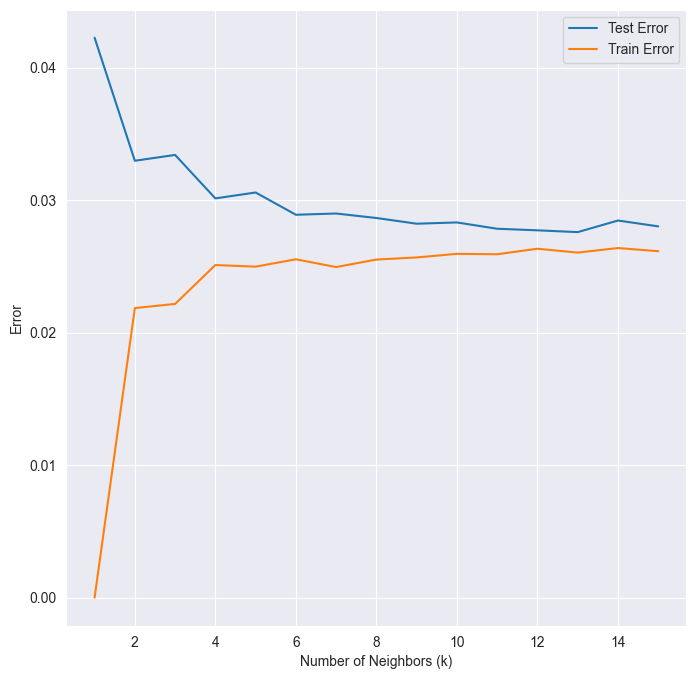

In [23]:
# Plotting k vs train and test error
plt.figure(figsize = (8, 8))

plt.xlabel("Number of Neighbors (k)")

plt.ylabel("Error")

plt.plot(kl, vl, label = 'Test Error')

plt.plot(kl, v2, label = 'Train Error')

plt.legend()

plt.show()

**Observation**: 

- From the above graph, we can say that K=15 gives us the generalized model with very similar train and test errors.